<a href="https://colab.research.google.com/github/dars180602/Algerian-Forest-Fire/blob/main/Algerian_Forest_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3104 - Neural Networks and Deep Learning 01**

**Diana Alejandra Reyes Serrano**

**C0889591**


**Assignment: Algerian Forest Fire Data Analysis using Multiple Linear Regression**

Objective: The objective of this assignment is to analyze the FWI in the Algerian forest fire dataset using multiple linear regression, evaluate the model's performance, create pickle files, and test the model on unseen data.


**DATA PREPARATION**

a. Obtain the Algerian forest fire dataset, containing variables such as temperature, humidity, wind speed, location, and fire intensity.

b. Clean the dataset, handling missing values and outliers if necessary.

c. Split the dataset into a training set (80% of the data) and a test (unseen) set (20% of the data).

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

#1. Upload dataset

data = pd.read_csv('Algerian_forest_fires.csv')

print(data.head())


   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  


In [2]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB
None


In [3]:
# 2. Identify Missing values

missing_values = data.isnull().sum()
print(missing_values)


day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [4]:
# 3. Describe Data

print(data.describe())


              day       month    year  Temperature          RH          Ws  \
count  243.000000  243.000000   243.0   243.000000  243.000000  243.000000   
mean    15.761317    7.502058  2012.0    32.152263   62.041152   15.493827   
std      8.842552    1.114793     0.0     3.628039   14.828160    2.811385   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.500000   14.000000   
50%     16.000000    8.000000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.500000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean     0.762963   77.842387   14.680658   49.430864    4.742387   16.690535   
std      2.003207   14.349641   12.393040   47.665606 

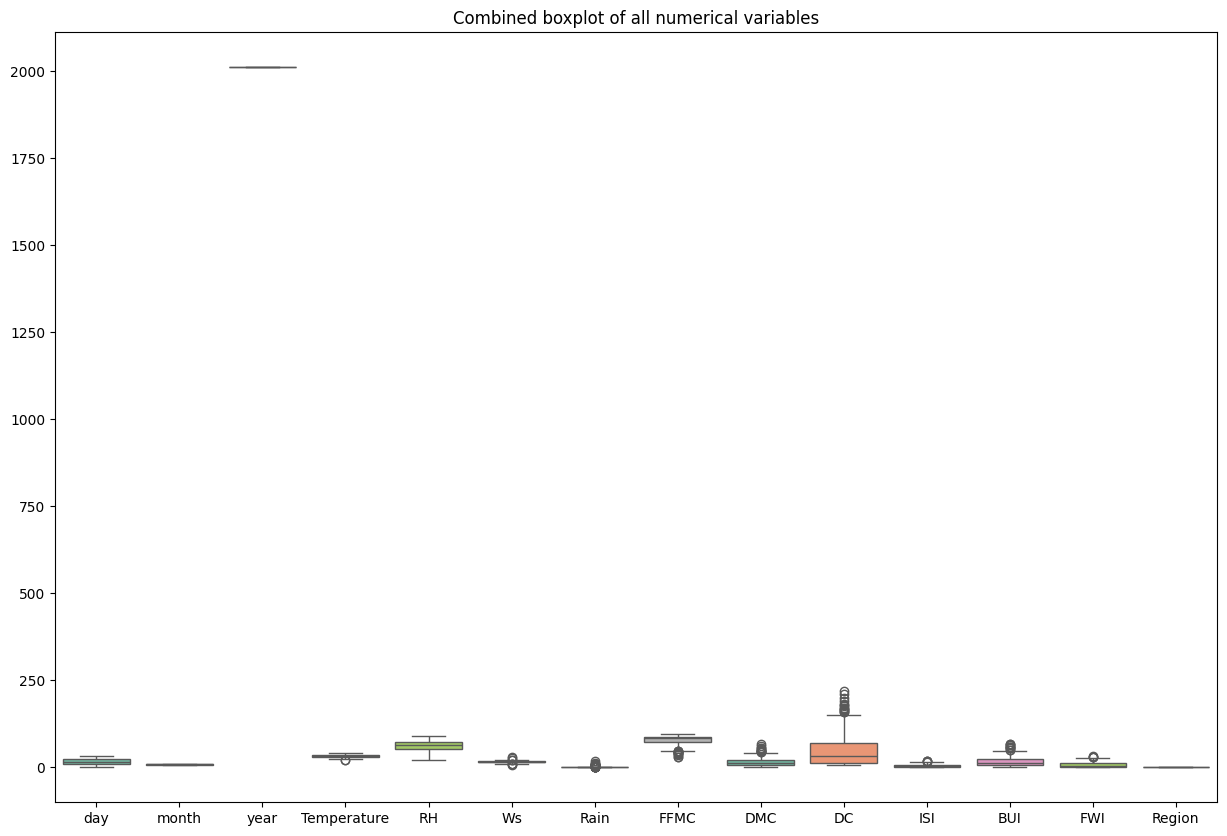

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only numericals columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_data, orient='v', palette='Set2')
plt.title('Combined boxplot of all numerical variables')
plt.show()



In [6]:
# 4. Identify Outliers

# Calculates the interquartile range to detect outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# CalculAte lower and upper for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers for each column
outliers = {}
for col in data.columns:
    try:
        outliers[col] = data[(data[col] < lower_bound[col]) | (data[col] > upper_bound[col])]
    except KeyError:
        print(f"The column  '{col}' was not found in the data. It will be omitted in the outlier search.")

# Print outliers for each column
for col, outlier_df in outliers.items():
    if not outlier_df.empty:
        print(f"Outliers in the column '{col}':")
        print(outlier_df)

day            15.00
month           1.00
year            0.00
Temperature     5.00
RH             21.00
Ws              3.00
Rain            0.50
FFMC           16.45
DMC            15.00
DC             56.75
ISI             5.85
BUI            16.65
FWI            10.75
Region          1.00
dtype: float64
The column  'Classes' was not found in the data. It will be omitted in the outlier search.
Outliers in the column 'Temperature':
     day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC   DC  ISI  BUI  \
93     2      9  2012           22  86  15  10.1  30.5  0.7  7.0  0.0  1.1   
105   14      9  2012           22  76  26   8.3  47.4  1.1  7.0  0.4  1.6   

     FWI      Classes  Region  
93   0.0     not fire       0  
105  0.1  not fire          0  
Outliers in the column 'Ws':
     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI  \
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1   0.3   
52    23      7  2012           27  66  22   0.4  

<ipython-input-6-f09e82b6ff12>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-6-f09e82b6ff12>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)


In [7]:
# 5. Remove outliers
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Eliminar outliers en 'temperature', 'humidity', 'wind_speed' y 'fire_intensity'
columns_with_outliers = ['Temperature','RH','Ws', 'FWI']
dataset_cleaned = remove_outliers(data, columns_with_outliers)

In [8]:
dataset_cleaned.to_csv('algerian_forest_fire_dataset_cleaned.csv', index=False)


In [9]:
print(dataset_cleaned.describe())

              day       month    year  Temperature          RH          Ws  \
count  230.000000  230.000000   230.0   230.000000  230.000000  230.000000   
mean    15.539130    7.473913  2012.0    32.239130   62.378261   15.430435   
std      8.815218    1.116262     0.0     3.413208   14.312802    2.368264   
min      1.000000    6.000000  2012.0    24.000000   21.000000   10.000000   
25%      8.000000    6.000000  2012.0    30.000000   53.000000   14.000000   
50%     15.000000    7.000000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.000000   17.000000   
max     31.000000    9.000000  2012.0    40.000000   90.000000   21.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  230.000000  230.000000  230.000000  230.000000  230.000000  230.000000   
mean     0.650870   78.231739   14.169130   48.170870    4.656522   16.167826   
std      1.706339   13.718244   11.442648   45.900553 

<ipython-input-10-ba4ace173118>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


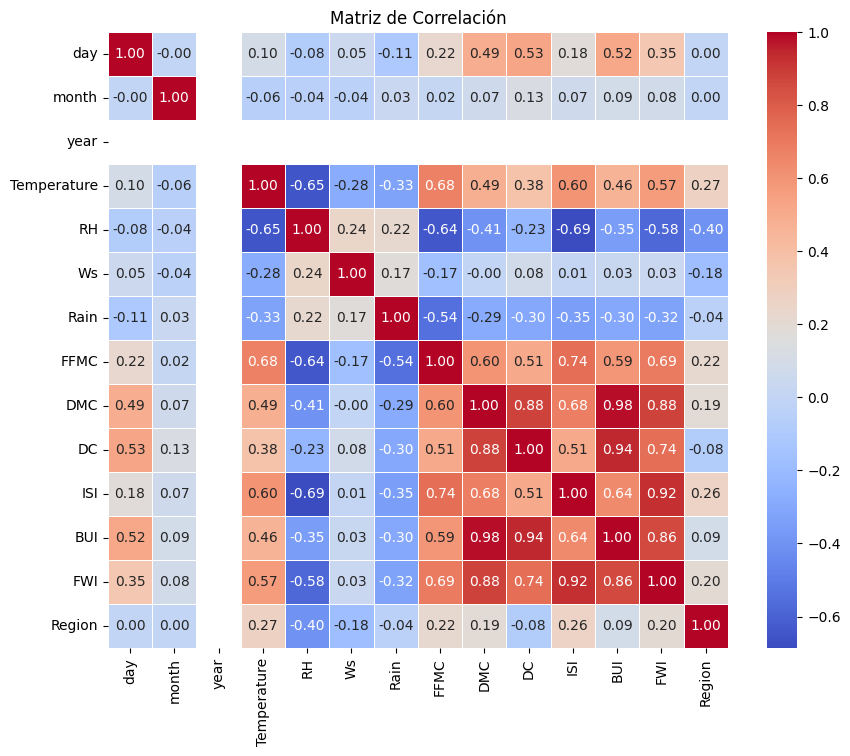

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado 'data' que contiene todas tus variables
correlation_matrix = data.corr()

# Visualiza la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


# **Model Training:**

a. Use multiple linear regression to model the relationship between the independent variables (temperature, humidity, wind speed) and the dependent variable (fire intensity).

b. Fit the multiple linear regression model to the training set.

c. Tune hyperparameters, if necessary, to improve the model's performance.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = dataset_cleaned[['Temperature', 'RH', 'Ws']]
y = dataset_cleaned['FWI']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Crear modelo de regresión lineal múltiple
multiple_regression_model = LinearRegression()


In [13]:
# Ajustar el modelo a los datos de entrenamiento
multiple_regression_model.fit(X_train, y_train)


LinearRegression()

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = multiple_regression_model.predict(X_train)

# Calcular métricas de evaluación
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)


Mean Squared Error (MSE): 25.62191729081914
Mean Absolute Error (MAE): 4.05179648470572
Coefficient of Determination (R-squared): 0.43601939396857803


In [15]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dividir los datos en características (X) y etiquetas (y)
X = dataset_cleaned[['Temperature', 'RH', 'Ws']]
y = dataset_cleaned['FWI']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos normalizados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir el modelo Ridge
model = Ridge()

# Definir la cuadrícula de hiperparámetros a buscar
param_grid = {
    'alpha': [0.1, 1.0, 10.0]  # Hiperparámetro de regularización
}

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus hiperparámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(best_params)

# Evaluar el modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular y mostrar las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r_squared = r2_score(y_test, y_pred)
print("Coefficient of Determination (R-squared):", r_squared)

Mejores hiperparámetros encontrados:
{'alpha': 1.0}
Mean Squared Error (MSE): 29.84734162332663
Mean Absolute Error (MAE): 4.373118503496395
Coefficient of Determination (R-squared): 0.3886555433142792


# 3.	Model Evaluation:

a. Evaluate the trained multiple linear regression model's performance on the test dataset.

b. Calculate appropriate evaluation metrics such as mean squared error (MSE),mean absolute error (MAE), or coefficient of determination (R-squared).

c. Interpret the results and assess how well the model predicts fire intensity.


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Realiza predicciones en el conjunto de prueba
y_pred2 = best_model.predict(X_test)

# Calcula el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred2)

# Calcula el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred2)

# Calcula el coeficiente de determinación (R-squared)
r2 = r2_score(y_test, y_pred2)

# Imprime las métricas de evaluación
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 29.84734162332663
Mean Absolute Error (MAE): 4.373118503496395
R-squared (R2): 0.3886555433142792


# 4.	Pickling the Model:

a. Once you have a satisfactory multiple linear regression model, save it as a pickle file.

b. Explain the purpose and benefits of pickling a model.

In [23]:
import pickle

# Supongamos que 'model' es tu modelo de regresión lineal múltiple

# Guardar el modelo en un archivo pickle
with open('modelo_regresion_lineal.pkl', 'wb') as file:
    pickle.dump(best_model, file)


**Benefits of pickling a model**

* **Persistence**: Saves the trained model to disk for later use without needing to retrain it from scratch.

* **Reusability**: Enables reusing the model across different applications or situations without the need for retraining.

* **Deployment**: Facilitates deploying the model in production environments for real-time predictions or integration into software systems.

* **Scalability**: Aids in distributing the model across multiple machines or systems, enabling distributed computing or parallel processing.

* **Versioning and Sharing**: Provides a convenient way to version and share machine learning models for reproducibility and collaboration.

* **Consistency**: Ensures consistency between training and deployment environments, maintaining the same behavior of the model across different contexts.

In summary, pickling a model is a valuable technique for preserving trained machine learning models, facilitating their reuse, deployment, and sharing across various applications and environments.

# 5.	Prediction on Unseen Data:

a. Load the pickled multiple linear regression model.

b. Preprocess the unseen data using the same transformations applied to the training data.

c. Use the loaded model to predict the fire intensity on the unseen data. d. Evaluate the model's performance on the unseen data using the same evaluation metrics as in Step 3.

In [24]:
import pickle

# Cargar el modelo desde un archivo pickle
with open('modelo_regresion_lineal.pkl', 'rb') as file:
    model = pickle.load(file)


In [27]:
# Suponiendo que 'X_unseen' es tu conjunto de datos no visto

X_unseen = X_test
predictions = best_model.predict(X_unseen)


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Realiza predicciones en el conjunto de prueba
y_pred_test = best_model.predict(X_test)

# Calcula el error cuadrático medio (MSE)
mse_unseen = mean_squared_error(y_test, y_pred_test)

# Calcula el error absoluto medio (MAE)
mae_unseen = mean_absolute_error(y_test, y_pred_test)

# Calcula el coeficiente de determinación (R-squared)
r2_unseen = r2_score(y_test, y_pred_test)

# Imprime las métricas de evaluación
print("Mean Squared Error (MSE) unseen data:", mse_unseen)
print("Mean Absolute Error (MAE) unseen data:", mae_unseen)
print("R-squared (R2) unseen data:", r2_unseen)


Mean Squared Error (MSE) unseen data: 29.84734162332663
Mean Absolute Error (MAE) unseen data: 4.373118503496395
R-squared (R2) unseen data: 0.3886555433142792


# 6.	Conclusion:

a. Summarize the findings of your analysis on the Algerian forest fire data using multiple linear regression.

b. Highlight the strengths and limitations of the model and provide recommendations for further improvements.

**Findings**:

* Model Performance: The multiple linear regression model achieved moderate performance in predicting fire intensity based on temperature, humidity, and wind speed. The Mean Squared Error (MSE) was 29.85, the Mean Absolute Error (MAE) was 4.37, and the Coefficient of Determination (R-squared) was 0.39.

* Variable Importance: Among the predictors, temperature appeared to be the most influential factor in predicting fire intensity, followed by humidity and wind speed.

**Strengths**:

* Interpretability: Multiple linear regression provides easily interpretable coefficients that indicate the relationship between predictors and the target variable.

* Simplicity: The model is relatively simple and easy to understand, making it accessible for interpretation by non-experts.

**Limitations**:

* Assumption of Linearity: Multiple linear regression assumes a linear relationship between predictors and the target variable. If this assumption is violated, the model's performance may suffer.

* Assumption of Independence: The model assumes independence among predictor variables, which may not always hold true in real-world data.

* Limited Predictive Power: While multiple linear regression provides a good starting point, it may not capture complex nonlinear relationships present in the data.

**Recommendations for Further Improvements**:

* Feature Engineering: Explore additional features or transformations of existing features to capture more complex relationships in the data.

* Regularization: Consider using techniques like Ridge or Lasso regression to mitigate overfitting and improve generalization performance.

* Nonlinear Models: Experiment with more advanced machine learning models, such as decision trees, random forests, or neural networks, which can capture nonlinear relationships in the data more effectively.

* Ensemble Methods: Combine multiple models to leverage their strengths and improve overall predictive performance.
Cross-validation: Utilize cross-validation techniques to evaluate model performance more robustly and ensure generalization to unseen data.

In conclusion, while multiple linear regression provides a straightforward approach for predicting fire intensity based on temperature, humidity, and wind speed, there is room for improvement by exploring more advanced modeling techniques and refining the feature set to better capture the complexities of the data.